# Reproduce codeml analysis from Yang Z (MBE, 1998) 


This recipe shows how to reproduce the analysis carried out in [Yang Z (MBE, 1998)](http://www.ncbi.nlm.nih.gov/pubmed/9580986) using `ete-evol`. The data files are extracted from the examples in the PAML package, small dataset will be used:

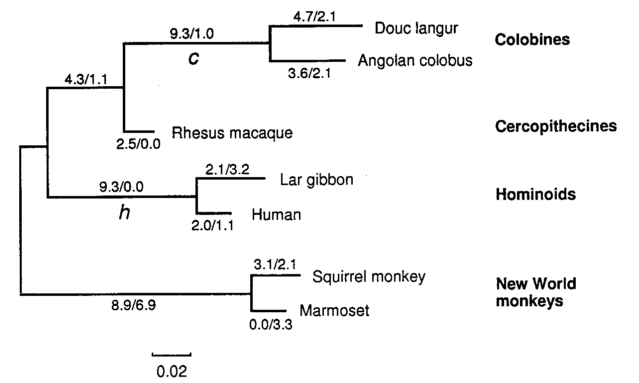

In [21]:
from IPython.display import Image
Image(filename='data/lysozyme/Lysozyme_small_tree.png')

The files that we are going to use for this example are:
* data/lysozyme/lysozymeSmall.txt
* data/lysozyme/lysozymeSmall.trees
* data/lysozyme/lysozymeSmall.ctl

## Requirements

- ete3
- ete3_external_tools

## Branch models

We are now going to try to reproduce the results of the papper corresponding to this example [Yang Z (MBE, 1998)](http://www.ncbi.nlm.nih.gov/pubmed/9580986).

Infact we are going to reproduce the results presented in the Table 1 of the paper (for the small dataset, red rectangle):

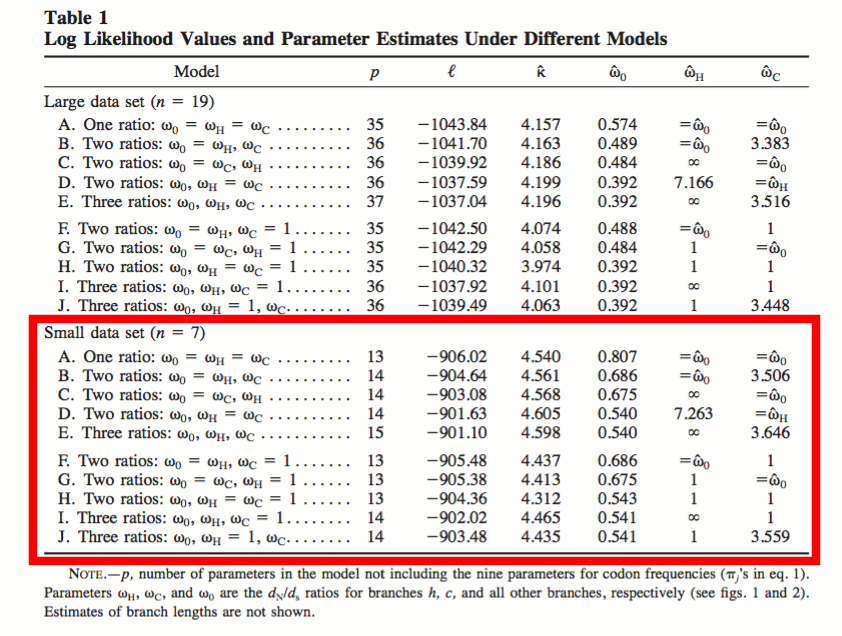

In [10]:
from IPython.display import Image
Image(filename='data/lysozyme/table1_paper.png')

The first model to run would be the model M0 where all branches are constrained to evolve under a unique $\omega$ value ($\omega_0=\omega_h=\omega_c$)

In [11]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model M0

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model M0
SUMMARY BY MODEL

 - Model M0
   * Average omega for all tree: 0.807


The estimated value of $\omega$ of 0.807 here displayed in the summary report indeed corresponds to the value in the table (raw A of the section of interest)

Next we would run a branch model that allows the *c* branch (ancestor of Douc langur and Angolan colobus) to evolve independently (we use the flag `--mark` giving the names of the two species separated by a double comma, meaning that we want to mark the ancestor only).

In [12]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free --clear_all \
--mark Pne_langur,,Cgu/Can_colobus --clear_tree

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model b_free
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_free.11-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   3.506
      background  =>   0.686


This time, two values of omega are estimated, one for the marked branch (#1 $\omega_c$ in the table), and one corresponding to the rest of the tree, commonly refferd to as "background" omega, or $\omega_0$. Again, the values estimated here are equivalent to the ones in the table.

*Note: the use of the flag `--clear_tree` that will remove all marks present in the input tree before starting the analysis.*

We now repeat the analysis marking the *h* branch:

In [13]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free --clear_all \
--mark Hsa_Human,,Hla_gibbon --clear_tree

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model b_free
       marking branches 9

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur),Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_free.9-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur),Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
      background  =>   0.675
              #1  => 999.000


We find again the same result as in Table1 ($\omega$ of 999 are equivalent to infinite).

For the D. model of Table1 we need to mark two branches wih the same mark, which can be done with the command line with `--mark Hsa_Human,,Hla_gibbon=Pne_langur,,Cgu/Can_colobus` or perhaps, for this more complicated case, easily using the --interactive flag. This flag will allow you to click on the nodes to be marked:

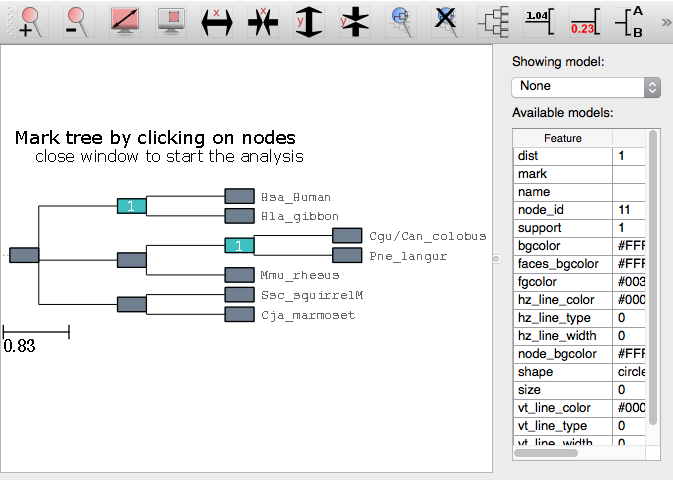

In [14]:
from IPython.display import Image
Image(filename='data/lysozyme/marking_tree_b_free_1_1.png')

*Note: after closing this window, an other window will pop-up in case you want to mark again the tree for an extra analysis. Just close the second window, and the analysis will start*

In [24]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free \
--clear_tree --clear_all --interactive

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model b_free
       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon)  #1,((Cgu/Can_colobus,Pne_langur)  #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_free.9_11-1_1
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
      background  =>   0.540
              #1  =>   7.263


/Users/jhc/_Devel/ete_master/ete3/tools/ete_evol.py:424: UserWarning: WARNING: removing duplicated mark (Hsa_Human,Hla_gibbon); #1 (Cgu/Can_colobus,Pne_langur); #1
  for n in range(len(nodes[bad]))])))


This time again our results coincide with the one in Table1, the $omega$ value of branches *h* and *c* when evolving at the same rate is 7.263.

For the E. model of Table1, we will mark diferrently the branches *h* and *c*:

In [16]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_free --clear_all \
--clear_tree --mark Hsa_Human,,Hla_gibbon,Pne_langur,,Cgu/Can_colobus

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model b_free
       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #2,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_free.9_11-1_2
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #2,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #2  =>   3.646
              #1  => 999.000
      background  =>   0.540


For the next models F. to H. we will run them all together using the command line (as these are 3 models we will use 3 processors or CPUs):

In [17]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_neut --clear_all \
--clear_tree --cpu 3 \
--mark Pne_langur,,Cgu/Can_colobus Hsa_Human,,Hla_gibbon Hsa_Human,,Hla_gibbon=Pne_langur,,Cgu/Can_colobus

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (3 CPUs)
  - processing model b_neut
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 9

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur),Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_neut.11-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   1.000
      background  =>   0.686

 - Model b_neut.9_11-1_1
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        B

We have used the `b_neut` model which will fix the value of $\omega$ to 1 in the branches labelled with the last mark (in this case #1).

We will now run together the last 2 models proposed in Table1 (models I. and J.). This time the last mark has to be placed respectively on the *c* branch and on the *h* branch:

In [18]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model b_neut --clear_all \
--clear_tree --cpu 2 \
--mark Hsa_Human,,Hla_gibbon,Pne_langur,,Cgu/Can_colobus Pne_langur,,Cgu/Can_colobus,Hsa_Human,,Hla_gibbon

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (2 CPUs)
  - processing model b_neut
       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #2,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 11, 9

          ((Hsa_Human,Hla_gibbon) #2,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model b_neut.9_11-1_2
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #2,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  => 999.000
      background  =>   0.541
              #2  =>   1.000

 - Model b_neut.11_9-1_2
   * Marked branches
      ((Hsa_Human,Hla_gibbon) #2,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   3.559
      background  =>   0.541
              #2  

### Likelihood Ratio Tests

In the previous section we have estimated selective pressures under several evolutionary models. In order to decide which of these models are the most probable Ziheng Yang uses the likelihood ratio test (LRT) between pair of models. The result of these test is presented in the Table 2 of his paper (again red rectangle marking the results for the small dataset we are interested in):

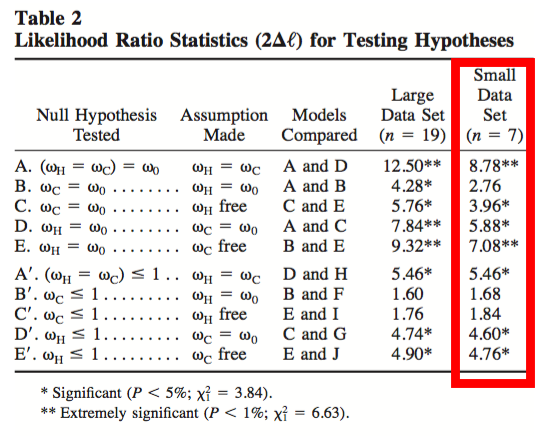

In [19]:
from IPython.display import Image
Image(filename='data/lysozyme/table2_paper.png')

By default the `ete_evol` tool computes all possible LRT between the computed models. Thus if we run all previously executed models, we will have a LRT table comparable to the one in the paper.
*Note: we use here the `--resume` flag in order to **skip the computation** and just parse previous results*

In [20]:
%%bash
ete3 evol -t data/lysozyme/lysozymeSmall.trees --alg data/lysozyme/lysozymeSmall.txt --model M0 b_free b_neut \
--resume --clear_tree \
--mark Pne_langur,,Cgu/Can_colobus Hsa_Human,,Hla_gibbon Hsa_Human,,Hla_gibbon=Pne_langur,,Cgu/Can_colobus \
Pne_langur,,Cgu/Can_colobus,Hsa_Human,,Hla_gibbon Hsa_Human,,Hla_gibbon,Pne_langur,,Cgu/Can_colobus

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model M0
  - processing model b_free
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 9

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur),Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 11, 9

          ((Hsa_Human,Hla_gibbon) #2,((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

       marking branches 9, 11

          ((Hsa_Human,Hla_gibbon) #1,((Cgu/Can_colobus,Pne_langur) #2,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

  - processing model b_neut
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobu